In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


events = pd.read_csv('events_month.csv')
ridership = pd.read_csv('max_ridership.csv') #contains data on number of riders at each stop
order = pd.read_csv('blueline_order.csv') #contains data on stop order


#focus on Blue Line to Gresham, the line with the most delays
events = events.loc[events['signMessageLong'] == 'MAX  Blue Line to Gresham']

In [111]:
#clean and join ridership and ride order data
order["order"] = order["order"].map(str).str.zfill(2)
ridership['location_name'] = ridership['location_name'].str.strip()
ridership_clean = pd.merge(ridership, order, left_on=['location_name','direction'], right_on=['location_name','direction_gresham'])
ridership_clean = ridership_clean.drop('direction_hillsboro', axis=1).sort_values(by=['order'])
ridership_clean

,location_id,location_name,direction,ons,offs,order,direction_gresham
16,9848,Hatfield Government Center,S,1088,948,01,S
18,9846,Hillsboro Central/SE 3rd TC,E,751,51,02,E
36,9843,Tuality Hospital/SE 8th Ave,E,392,74,03,E
38,9841,Washington/SE 12th Ave,E,363,114,04,E
11,9838,Fair Complex/Hillsboro Airport,E,736,106,05,E
17,9839,Hawthorn Farm,E,276,96,06,E
28,9835,Orenco,E,918,299,07,E
30,9834,Quatama,E,1147,255,08,E
39,9831,Willow Creek/SW 185th Ave TC,E,1263,484,09,E
10,9830,Elmonica/SW 170th Ave,E,1110,261,10,E


In [114]:
#join on events and concatenate the stop order number with the stop name
df = pd.merge(events,ridership_clean, left_on='nextLocID',right_on='location_id')
df["stop"] = df["order"].map(str) + " " + df["location_name"]
df["nextStopSeq"] = df["nextStopSeq"].map(str).str.zfill(2)

#compare delay time at the current stop to the delay time at the previous stop
# to find whether a train became more delayed between stops
df['prev_delay'] = df.sort_values(by=['tripID','vehicle_id','nextStopSeq'])['delay'].shift(1) 
df['added_delay'] = df['delay'] - df['prev_delay'] 
df.loc[df.added_delay > 0, 'added_delay'] = 0 
df

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,...,location_id,location_name,direction,ons,offs,order,direction_gresham,stop,prev_delay,added_delay
0,99,59,2017-01-01 00:00:48,8357,46,8359,47,MAX Blue Line to Gresham,6998866,218,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,NaN,NaN
1,99,59,2017-01-01 00:00:48,8357,46,8359,47,MAX Blue Line to Gresham,6998866,309,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,59.0,0.0
2,99,18,2017-01-01 00:15:11,8357,46,8359,47,MAX Blue Line to Gresham,6998867,208,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-5.0,0.0
3,99,18,2017-01-01 00:15:11,8357,46,8359,47,MAX Blue Line to Gresham,6998867,243,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-5.0,0.0
4,89,-177,2017-01-01 00:33:42,8357,46,8359,47,MAX Blue Line to Gresham,6998868,124,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-224.0,0.0
5,89,-177,2017-01-01 00:33:42,8357,46,8359,47,MAX Blue Line to Gresham,6998868,307,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-224.0,0.0
6,99,-58,2017-01-01 00:46:27,8357,46,8359,47,MAX Blue Line to Gresham,6998869,110,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-93.0,0.0
7,99,-58,2017-01-01 00:46:27,8357,46,8359,47,MAX Blue Line to Gresham,6998869,306,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-93.0,0.0
8,89,-272,2017-01-01 01:05:17,8357,46,8359,47,MAX Blue Line to Gresham,6998870,205,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-317.0,0.0
9,89,-272,2017-01-01 01:05:17,8357,46,8359,47,MAX Blue Line to Gresham,6998870,245,...,8359,Cleveland Ave,W,1013,1050,50,W,50 Cleveland Ave,-317.0,0.0


In [117]:
#reshape dataframe for graphing
df = df[['stop','ons','offs','added_delay']].groupby(['stop']).mean().reset_index()
ons = df[['stop','ons']].melt(id_vars= ['stop'], var_name = 'ons' )
offs = df[['stop','offs']].melt(id_vars= ['stop'], var_name = 'offs')
ons.columns = ['stop','direction','riders']
offs.columns = ['stop','direction','riders']
offs['riders'] = offs['riders']*-1

riders = pd.concat([ons, offs])
riders = pd.merge(riders, df[['stop','added_delay']]).sort_values('stop')
riders.head()

,stop,direction,riders,added_delay
0,01 Hatfield Government Center,ons,1088,-12.371058
1,01 Hatfield Government Center,offs,-948,-12.371058
2,02 Hillsboro Central/SE 3rd TC,ons,751,-34.386555
3,02 Hillsboro Central/SE 3rd TC,offs,-51,-34.386555
4,03 Tuality Hospital/SE 8th Ave,ons,392,-4.353613


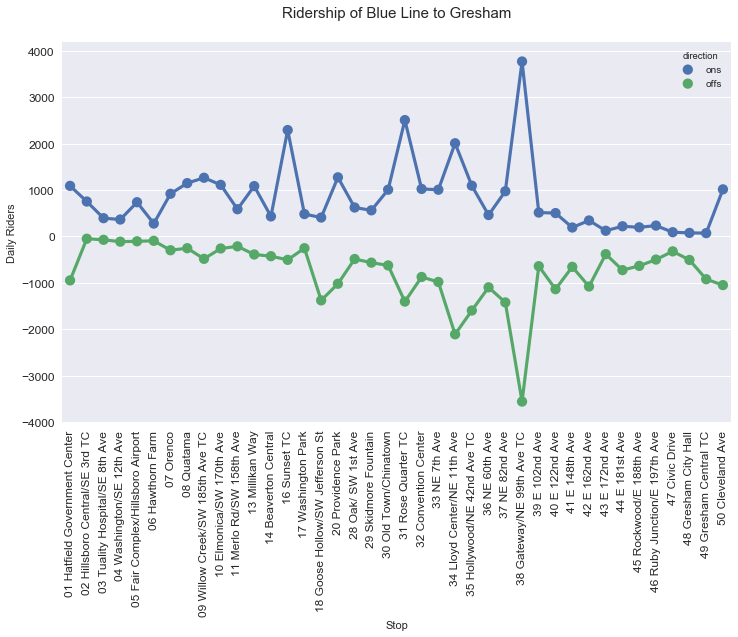

In [177]:
#plot ridership at each stop
plt.rcParams["font.family"] = "sans-serif"
sns.mpl.rc("figure", figsize=(12,7))
ax = sns.pointplot( x='stop', y='riders', hue='direction', data=riders)
ax.set(xlabel="Stop", ylabel="Daily Riders")
title = plt.title("Ridership of Blue Line to Gresham", fontsize=15)
title.set_position([.5, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()

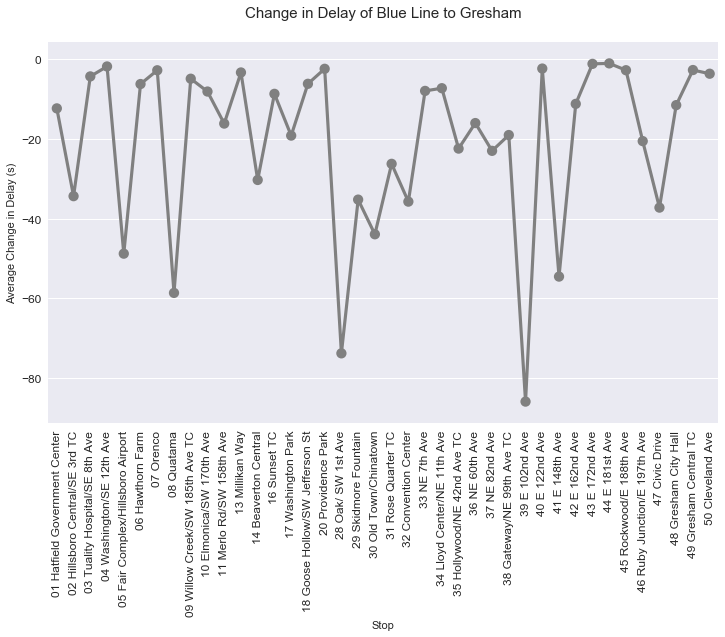

Note there are some missing stops in the dataset. Certain stops are more likely to cause delay. A notable stop is Gateway/NE 99th Ave Transit Center, where there is the largest number of riders are getting on and off, and also the greatest increase in delay getting to the subsequent stop, E 102nd Ave. The delay could be attributed to the influx of rider activity.


In [181]:
#plot added delay at each stop and compare to ridership
ax = sns.pointplot( x='stop', y='added_delay', color='gray', data=riders)
ax.set(xlabel="Stop", ylabel="Average Change in Delay (s)")
plt.xticks(rotation=90)
title = plt.title("Change in Delay of Blue Line to Gresham", fontsize=15)
title.set_position([.5, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Note there are some missing stops in the dataset. Certain stops are more likely to cause delay. '
      'A notable stop is Gateway/NE 99th Ave Transit Center, where there is the largest number of riders are getting '
      'on and off, and also the greatest increase in delay getting to the subsequent stop, E 102nd Ave. '
      'The delay could be attributed to the influx of rider activity.')

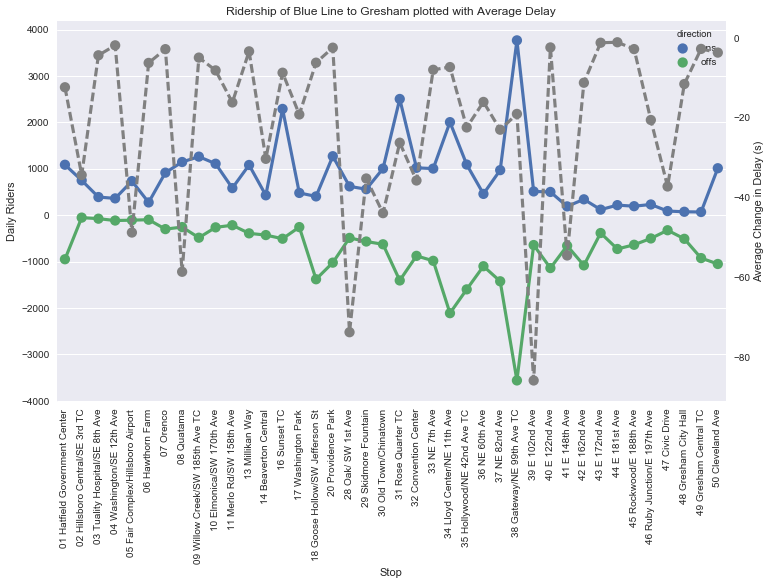

In [178]:
#overlap ridership and delay
sns.mpl.rc("figure", figsize=(12,7))
ax = sns.pointplot( x='stop', y='riders', hue='direction', data=riders)
ax.set(xlabel="Stop", ylabel="Daily Riders", title= "Ridership of Blue Line to Gresham plotted with Average Delay")
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2 = sns.pointplot( x='stop', y='added_delay', color = 'gray', linestyles=["--","--"], data=riders)
ax2.set(ylabel="Average Change in Delay (s)")
ax2.grid(False)
plt.show()
